In [1]:
import gridgeo


gridgeo.__version__

'0.2.1+12.g84288ec.dirty'

In [2]:
url = 'http://omgsrv1.meas.ncsu.edu:8080/thredds/dodsC/fmrc/us_east/US_East_Forecast_Model_Run_Collection_best.ncd'

grid = gridgeo.GridGeo(
    url,
    standard_name='sea_water_potential_temperature'
)

In [3]:
grid.mesh

'unknown_2d'

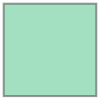

In [4]:
grid.outline

The grid has 192881, showing the first 5.


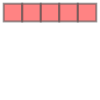

In [5]:
print(f'The grid has {len(grid.polygons)}, showing the first 5.')

grid.polygons[:5]

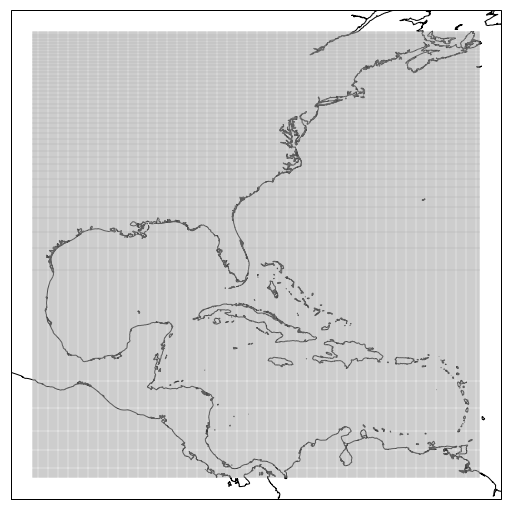

In [6]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

ax.plot(
    grid.x, grid.y, 'darkgray',
    grid.x.T, grid.y.T, 'darkgray',
    alpha=0.25,
)

ax.coastlines(resolution='10m');

In [7]:
import folium


x, y = grid.outline.centroid.xy

m = folium.Map(location=[y[0], x[0]])
folium.GeoJson(grid.outline.__geo_interface__).add_to(m)
m.fit_bounds(m.get_bounds())

m